In [1]:
import csv

In [2]:
# Open and read the CSV file
with open('water_potability.csv', mode='r', newline='') as file:
    reader = csv.reader(file)
    
    # Convert the CSV reader object to a list
    data = [row for row in reader]

# Print the first few rows
for row in data[:]:
    print(row)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
['', '204.8904554713363', '20791.318980747026', '7.300211873184757', '368.51644134980336', '564.3086541722439', '10.3797830780847', '86.9909704615088', '2.9631353806316407', '0']
['3.71608007538699', '129.42292051494425', '18630.057857970347', '6.635245883862', '', '592.8853591348523', '15.180013116357259', '56.32907628451764', '4.500656274942408', '0']
['8.099124189298397', '224.23625939355776', '19909.541732292393', '9.275883602694089', '', '418.6062130644815', '16.868636929550973', '66.42009251176368', '3.0559337496641685', '0']
['8.316765884214679', '214.37339408562252', '22018.417440775294', '8.05933237743854', '356.88613564305666', '363.2665161642437', '18.436524495493302', '100.34167436508008', '4.628770536837084', '0']
['9.092223456290965', '181.10150923612525', '17978.98633892625', '6.546599974207941', '310.13573752420444', '398.41081338184466'

In [3]:
import csv
import re

# Load data from CSV
with open('water_potability.csv', mode='r', newline='') as file:
    reader = csv.reader(file)
    header = next(reader)  # Extract the header row
    data = [row for row in reader]

# Display the original data (first 5 rows)
print("Original Data:")
for row in data[:5]:
    print(row)

# Preprocessing Steps
cleaned_data = []

for row in data:
    # Handle missing values by replacing empty fields with 'N/A'
    row = [value if value.strip() != '' else 'N/A' for value in row]

    # Normalize text data (trim spaces and convert to lowercase)
    row = [value.strip().lower() for value in row]

    # Remove invalid characters (example: remove non-alphanumeric characters)
    row = [re.sub(r'[^a-zA-Z0-9\s]', '', value) for value in row]

    # Convert numerical columns (example assumes 2nd and 3rd columns are numbers)
    try:
        row[1] = int(row[1]) if row[1] != 'N/A' else None
        row[2] = float(row[2]) if row[2] != 'N/A' else None
    except ValueError:
        row[1] = None
        row[2] = None

    cleaned_data.append(row)

# Remove duplicates
unique_data = []
seen = set()

for row in cleaned_data:
    row_tuple = tuple(row)
    if row_tuple not in seen:
        seen.add(row_tuple)
        unique_data.append(row)

# Display cleaned data (first 5 rows)
print("\nCleaned Data:")
print(header)
for row in unique_data[:5]:
    print(row)


Original Data:
['', '204.8904554713363', '20791.318980747026', '7.300211873184757', '368.51644134980336', '564.3086541722439', '10.3797830780847', '86.9909704615088', '2.9631353806316407', '0']
['3.71608007538699', '129.42292051494425', '18630.057857970347', '6.635245883862', '', '592.8853591348523', '15.180013116357259', '56.32907628451764', '4.500656274942408', '0']
['8.099124189298397', '224.23625939355776', '19909.541732292393', '9.275883602694089', '', '418.6062130644815', '16.868636929550973', '66.42009251176368', '3.0559337496641685', '0']
['8.316765884214679', '214.37339408562252', '22018.417440775294', '8.05933237743854', '356.88613564305666', '363.2665161642437', '18.436524495493302', '100.34167436508008', '4.628770536837084', '0']
['9.092223456290965', '181.10150923612525', '17978.98633892625', '6.546599974207941', '310.13573752420444', '398.41081338184466', '11.558279443446395', '31.997992727424737', '4.075075425430034', '0']

Cleaned Data:
['ph', 'Hardness', 'Solids', 'Chl

In [4]:
import csv
import re

# Input and output filenames
input_file = 'water_potability.csv'
output_file = 'cleaned_output.csv'

# Placeholder for missing values
missing_value_placeholder = 'N/A'

# Open the input CSV file and read its content
with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    
    # Read header
    header = next(reader, None)
    
    # Initialize a list to hold cleaned rows
    cleaned_data = []
    
    # Add the header to cleaned data
    if header:
        cleaned_data.append(header)
    
    # Process each row
    for row in reader:
        # Skip empty rows
        if not any(cell.strip() for cell in row):
            continue
        
        # Clean each cell in the row
        cleaned_row = [re.sub(r'\s+', ' ', cell.strip().lower()) if cell.strip() else missing_value_placeholder for cell in row]
        
        cleaned_data.append(cleaned_row)

# Write the cleaned data to a new CSV file
with open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_data)

print(f"Data cleaning complete! The cleaned data is saved to '{output_file}'.")

Data cleaning complete! The cleaned data is saved to 'cleaned_output.csv'.


In [5]:
import csv
import re
from collections import Counter

# Input and output filenames
input_file = 'water_potability.csv'
output_file = 'cleaned_output_data.csv'

# Read the data and store it in a list
with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    header = next(reader, None)
    
    # Initialize a list to hold cleaned rows
    data = []
    
    # Add the header to the cleaned data
    if header:
        data.append(header)
    
    for row in reader:
        # Skip completely empty rows
        if not any(cell.strip() for cell in row):
            continue
        
        # Clean each cell by stripping spaces and converting to lowercase
        cleaned_row = [re.sub(r'\s+', ' ', cell.strip().lower()) for cell in row]
        data.append(cleaned_row)

# Transpose the data to get columns for processing missing values
columns = list(zip(*data[1:]))

# Handle missing values by filling them with the most frequent value in each column
filled_columns = []
for col in columns:
    # Find non-empty cells in the column
    non_empty_cells = [cell for cell in col if cell.strip()]
    
    # Determine the most frequent value in the column
    most_frequent_value = Counter(non_empty_cells).most_common(1)[0][0] if non_empty_cells else ''
    
    # Replace empty cells with the most frequent value
    filled_column = [cell if cell.strip() else most_frequent_value for cell in col]
    filled_columns.append(filled_column)

# Transpose the data back to rows
cleaned_data = [header] + list(zip(*filled_columns))

# Write the cleaned data to a new CSV file
with open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_data)

print(f"Data cleaning complete! The cleaned data is saved to '{output_file}'.")


Data cleaning complete! The cleaned data is saved to 'cleaned_output_data.csv'.


In [6]:
import csv

# Input and output filenames
input_file = 'cleaned_output.csv'
output_file = 'cleaned_no_nulls_output.csv'

# Open the input CSV file and read its content
with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    
    # Read header
    header = next(reader, None)
    
    # Initialize a list to hold cleaned rows
    cleaned_data = []
    
    # Add the header to cleaned data
    if header:
        cleaned_data.append(header)
    
    # Process each row and remove rows with any null/empty values
    for row in reader:
        # Skip rows that contain any empty cell
        if '' in row or any(cell.strip() == '' for cell in row):
            continue
        
        # Add the valid row to the cleaned data
        cleaned_data.append(row)

# Write the cleaned data to a new CSV file
with open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_data)

print(f"Rows with null values have been removed! The cleaned data is saved to '{output_file}'.")


Rows with null values have been removed! The cleaned data is saved to 'cleaned_no_nulls_output.csv'.


In [7]:
import csv

# Input filename
input_file = 'cleaned_no_nulls_output.csv'

# Open the input CSV file and read its content
with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    
    # Read header
    header = next(reader, None)
    
    # Track rows containing 'N/A' values
    na_rows = []
    row_number = 1  # To keep track of row numbers, starting after the header
    
    for row in reader:
        row_number += 1
        if 'N/A' in [cell.strip() for cell in row]:
            na_rows.append((row_number, row))

# Display rows with 'N/A' values
if na_rows:
    print(f"Rows containing 'N/A' values:")
    for row_num, row in na_rows:
        print(f"Row {row_num}: {row}")
else:
    print("No 'N/A' values found in the dataset.")

Rows containing 'N/A' values:
Row 2: ['N/A', '204.8904554713363', '20791.318980747026', '7.300211873184757', '368.51644134980336', '564.3086541722439', '10.3797830780847', '86.9909704615088', '2.9631353806316407', '0']
Row 3: ['3.71608007538699', '129.42292051494425', '18630.057857970347', '6.635245883862', 'N/A', '592.8853591348523', '15.180013116357259', '56.32907628451764', '4.500656274942408', '0']
Row 4: ['8.099124189298397', '224.23625939355776', '19909.541732292393', '9.275883602694089', 'N/A', '418.6062130644815', '16.868636929550973', '66.42009251176368', '3.0559337496641685', '0']
Row 10: ['N/A', '118.98857909025189', '14285.583854224515', '7.804173553073094', '268.646940746221', '389.3755658712614', '12.70604896865791', '53.928845767512236', '3.5950171809576155', '0']
Row 13: ['7.974521648923869', '218.69330048866644', '18767.65668181348', '8.110384501123875', 'N/A', '364.09823046204866', '14.525745697593209', '76.48591117965157', '4.011718108339787', '0']
Row 15: ['N/A', '1

In [8]:
import csv

# Input and output filenames
input_file = 'cleaned_no_nulls_output.csv'
output_file = 'cleaned_no_NA_output.csv'

# Open the input CSV file and read its content
with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    
    # Read header
    header = next(reader, None)
    
    # Initialize a list to hold cleaned rows
    cleaned_data = []
    
    # Add the header to cleaned data
    if header:
        cleaned_data.append(header)
    
    # Process each row and remove rows with 'N/A' (case insensitive)
    for row in reader:
        if 'N/A' in (cell.strip().upper() for cell in row):
            continue
        
        # Add valid row to the cleaned data
        cleaned_data.append(row)

# Write the cleaned data to a new CSV file
with open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_data)

print(f"Rows with 'N/A' values have been removed! The cleaned data is saved to '{output_file}'.")


Rows with 'N/A' values have been removed! The cleaned data is saved to 'cleaned_no_NA_output.csv'.


In [9]:
import sqlite3

# Connect to SQLite database (creates a new database if it doesn't exist)
conn = sqlite3.connect('water_quality.db')
cursor = conn.cursor()

# Create Chemical_Components table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Chemical_Components (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Chloramines REAL,
    Sulfate REAL,
    Organic_carbon REAL,
    Trihalomethanes REAL
)
''')

# Create Other_Substances table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Other_Substances (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Turbidity REAL,
    ph REAL,
    Hardness REAL
)
''')

# Create Water_Quality table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Water_Quality (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Solids REAL,
    Hardness REAL,
    ph REAL,
    Potability INTEGER
)
''')

# Insert data into the tables from the CSV file
import csv

data_file = 'cleaned_no_NA_output.csv'

with open(data_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    header = next(reader)  # Skip header
    
    for row in reader:
        # Insert into Chemical_Components table
        cursor.execute('''
        INSERT INTO Chemical_Components (Chloramines, Sulfate, Organic_carbon, Trihalomethanes)
        VALUES (?, ?, ?, ?)
        ''', (row[3], row[4], row[6], row[7]))
        
        # Insert into Other_Substances table
        cursor.execute('''
        INSERT INTO Other_Substances (Turbidity, ph, Hardness)
        VALUES (?, ?, ?)
        ''', (row[8], row[0], row[1]))
        
        # Insert into Water_Quality table
        cursor.execute('''
        INSERT INTO Water_Quality (Solids, Hardness, ph, Potability)
        VALUES (?, ?, ?, ?)
        ''', (row[2], row[1], row[0], row[9]))

# Commit and close the connection
conn.commit()
conn.close()

print("Database and tables created successfully with data inserted!")
import sqlite3

# Connect to SQLite database (creates a new database if it doesn't exist)
conn = sqlite3.connect('water_quality.db')
cursor = conn.cursor()

# Create Chemical_Components table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Chemical_Components (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Chloramines REAL,
    Sulfate REAL,
    Organic_carbon REAL,
    Trihalomethanes REAL
)
''')

# Create Other_Substances table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Other_Substances (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Turbidity REAL,
    ph REAL,
    Hardness REAL
)
''')

# Create Water_Quality table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Water_Quality (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Solids REAL,
    Hardness REAL,
    ph REAL,
    Potability INTEGER
)
''')

# Insert data into the tables from the CSV file
import csv

data_file = 'cleaned_no_NA_output.csv'

with open(data_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    header = next(reader)  # Skip header
    
    for row in reader:
        # Insert into Chemical_Components table
        cursor.execute('''
        INSERT INTO Chemical_Components (Chloramines, Sulfate, Organic_carbon, Trihalomethanes)
        VALUES (?, ?, ?, ?)
        ''', (row[3], row[4], row[6], row[7]))
        
        # Insert into Other_Substances table
        cursor.execute('''
        INSERT INTO Other_Substances (Turbidity, ph, Hardness)
        VALUES (?, ?, ?)
        ''', (row[8], row[0], row[1]))
        
        # Insert into Water_Quality table
        cursor.execute('''
        INSERT INTO Water_Quality (Solids, Hardness, ph, Potability)
        VALUES (?, ?, ?, ?)
        ''', (row[2], row[1], row[0], row[9]))

# Commit and close the connection
conn.commit()
conn.close()

print("Database and tables created successfully with data inserted!")


Database and tables created successfully with data inserted!
Database and tables created successfully with data inserted!


In [10]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('water_quality.db')

# SQL query to join all three tables and fetch the data
query = '''
SELECT 
    wc.Solids,
    wc.Hardness AS wc_Hardness,
    wc.ph AS wc_ph,
    wc.Potability,
    cs.Chloramines,
    cs.Sulfate,
    cs.Organic_carbon,
    cs.Trihalomethanes,
    os.Turbidity,
    os.ph AS os_ph,
    os.Hardness AS os_Hardness
FROM 
    Water_Quality wc
JOIN 
    Chemical_Components cs ON wc.id = cs.id
JOIN 
    Other_Substances os ON wc.id = os.id
'''

# Execute the query and load data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
print(df.head())

print("Data successfully fetched into Pandas DataFrame!")


         Solids  wc_Hardness      wc_ph  Potability  Chloramines     Sulfate  \
0  22018.417441   214.373394   8.316766           0     8.059332  356.886136   
1  17978.986339   181.101509   9.092223           0     6.546600  310.135738   
2  28748.687739   188.313324   5.584087           0     7.544869  326.678363   
3  28749.716544   248.071735  10.223862           0     7.513408  393.663396   
4  13672.091764   203.361523   8.635849           0     4.563009  303.309771   

   Organic_carbon  Trihalomethanes  Turbidity      os_ph  os_Hardness  
0       18.436524       100.341674   4.628771   8.316766   214.373394  
1       11.558279        31.997993   4.075075   9.092223   181.101509  
2        8.399735        54.917862   2.559708   5.584087   188.313324  
3       13.789695        84.603556   2.672989  10.223862   248.071735  
4       12.363817        62.798309   4.401425   8.635849   203.361523  
Data successfully fetched into Pandas DataFrame!


In [11]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df.drop(columns=['Potability'])
y = df['Potability']

# Perform stratified train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the distribution in the train and test sets
train_distribution = y_train.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)

print("Train Set Distribution:\n", train_distribution)
print("\nTest Set Distribution:\n", test_distribution)


Train Set Distribution:
 Potability
0    0.596737
1    0.403263
Name: proportion, dtype: float64

Test Set Distribution:
 Potability
0    0.596644
1    0.403356
Name: proportion, dtype: float64


In [12]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split

# Connect to SQLite database
conn = sqlite3.connect('water_quality.db')

# SQL query to join all three tables and fetch the data
query = '''
SELECT 
    wc.Solids,
    wc.Hardness AS wc_Hardness,
    wc.ph AS wc_ph,
    wc.Potability,
    cs.Chloramines,
    cs.Sulfate,
    cs.Organic_carbon,
    cs.Trihalomethanes,
    os.Turbidity,
    os.ph AS os_ph,
    os.Hardness AS os_Hardness
FROM 
    Water_Quality wc
JOIN 
    Chemical_Components cs ON wc.id = cs.id
JOIN 
    Other_Substances os ON wc.id = os.id
'''

# Execute the query and load data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Define features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("Train/test split successfully performed!")


X_train shape: (25740, 10)
X_test shape: (6436, 10)
y_train shape: (25740,)
y_test shape: (6436,)
Train/test split successfully performed!


In [13]:
pip install ydata-profiling

  Obtaining dependency information for dacite>=1.8 from https://files.pythonhosted.org/packages/21/0f/cf0943f4f55f0fbc7c6bd60caf1343061dff818b02af5a0d444e473bb78d/dacite-1.8.1-py3-none-any.whl.metadata
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Attempting uninstall: dacite
    Found existing installation: dacite 1.6.0
    Uninstalling dacite-1.6.0:
      Successfully uninstalled dacite-1.6.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dagshub 0.4.0 requires dacite~=1.6.0, but you have dacite 1.8.1 which is incompatible.


In [14]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(df, explorative=True)

# Export the summary to a JSON dictionary
profile_json = profile.to_json()

# Print the first 1000 characters of the JSON summary for brevity
print(profile_json[:1000])

# Alternatively, export the report to an HTML file
profile.to_file("report.html")
print("A detailed report has been saved as 'report.html'.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

{
    "analysis": {
        "title": "Pandas Profiling Report",
        "date_start": "2024-12-21 18:38:41.683367",
        "date_end": "2024-12-21 18:39:16.221728"
    },
    "time_index_analysis": "None",
    "table": {
        "n": 32176,
        "n_var": 11,
        "memory_size": 2831620,
        "record_size": 88.00410243659871,
        "n_cells_missing": 0,
        "n_vars_with_missing": 0,
        "n_vars_all_missing": 0,
        "p_cells_missing": 0.0,
        "types": {
            "Numeric": 10,
            "Categorical": 1
        },
        "n_duplicates": 2011,
        "p_duplicates": 0.0625
    },
    "variables": {
        "Solids": {
            "n_distinct": 2011,
            "p_distinct": 0.0625,
            "is_unique": false,
            "n_unique": 0,
            "p_unique": 0.0,
            "type": "Numeric",
            "hashable": true,
            "value_counts_without_nan": {
                "22018.417440775294": 16,
                "37000.9556741392": 16,
  

C:\Users\chinm\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

A detailed report has been saved as 'report.html'.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(df, explorative=True)

# Display correlations as part of the profile report
print("Generating correlation matrix...")

# Extract the correlation matrix from the profile
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Generating correlation matrix...
                   Solids  wc_Hardness     wc_ph  Potability  Chloramines  \
Solids           1.000000    -0.053269 -0.087615    0.040674    -0.051789   
wc_Hardness     -0.053269     1.000000  0.108948   -0.001505    -0.022685   
wc_ph           -0.087615     0.108948  1.000000    0.014530    -0.024768   
Potability       0.040674    -0.001505  0.014530    1.000000     0.020784   
Chloramines     -0.051789    -0.022685 -0.024768    0.020784     1.000000   
Sulfate         -0.162769    -0.108521  0.010524   -0.015303     0.006254   
Organic_carbon  -0.005484     0.013224  0.028375   -0.015567    -0.023808   
Trihalomethanes -0.015668    -0.015400  0.018278    0.009244     0.014990   
Turbidity        0.019409    -0.034831 -0.035849    0.022682     0.013137   
os_ph           -0.087615     0.108948  1.000000    0.014530    -0.024768   
os_Hardness     -0.053269     1.000000  0.108948   -0.001505    -0.022685   

                  Sulfate  Organic_carbon 

C:\Users\chinm\AppData\Local\Temp\ipykernel_20792\1556251428.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [16]:
pip install plotext


Note: you may need to restart the kernel to use updated packages.


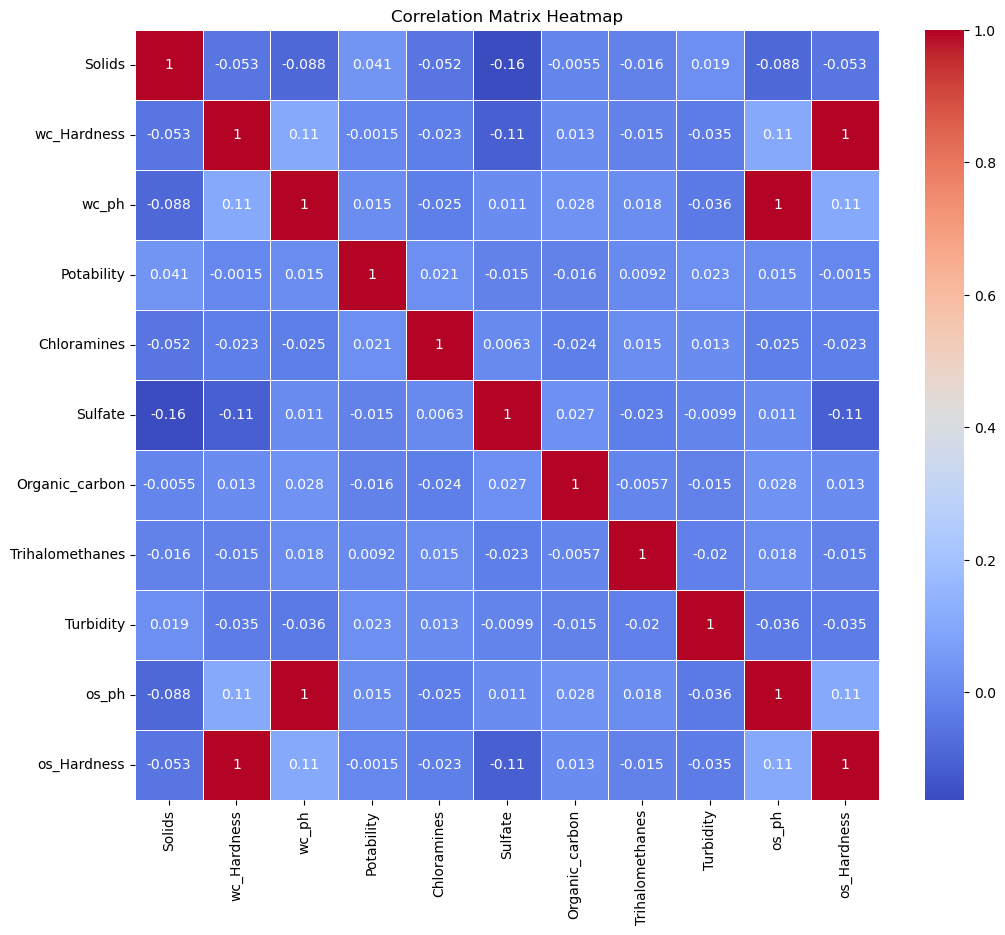

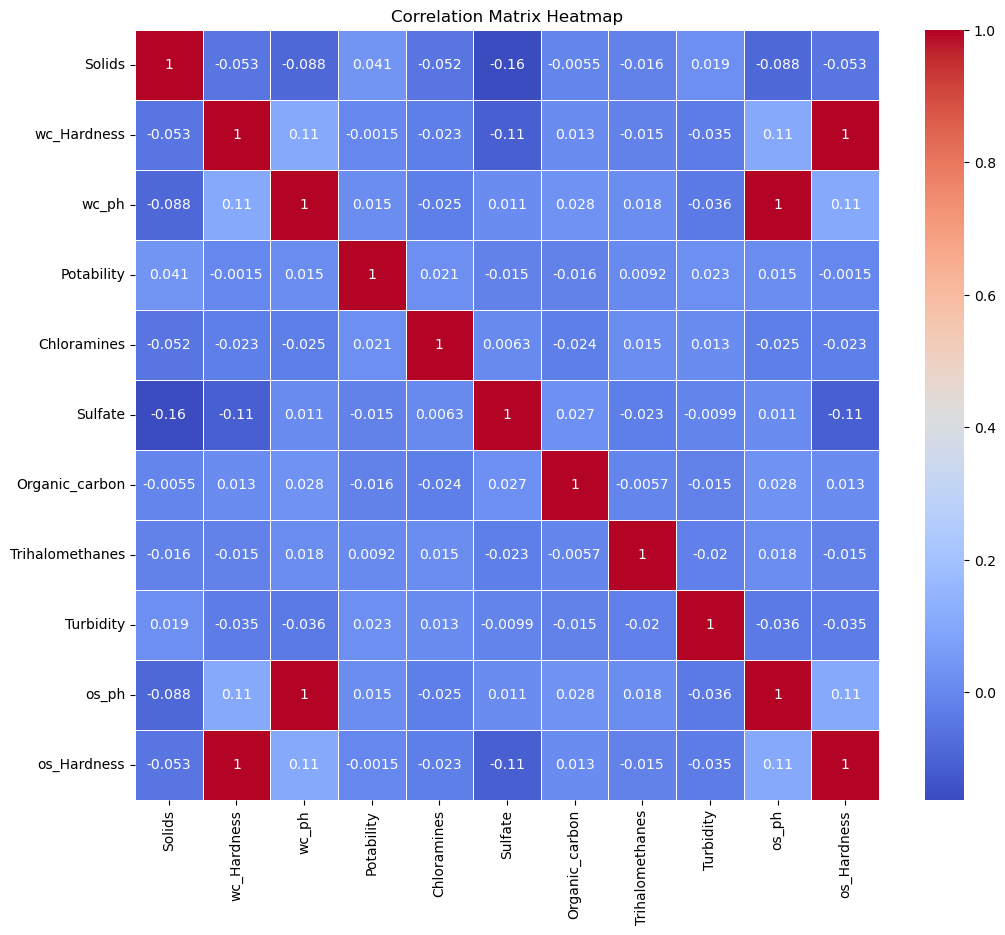

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [18]:
print(df.columns)


Index(['Solids', 'wc_Hardness', 'wc_ph', 'Potability', 'Chloramines',
       'Sulfate', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'os_ph',
       'os_Hardness'],
      dtype='object')



Missing Values Before Imputation:
Solids             0
wc_Hardness        0
wc_ph              0
Potability         0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
os_ph              0
os_Hardness        0
dtype: int64

Missing Values After Imputation:
Solids             0
wc_Hardness        0
wc_ph              0
Potability         0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
os_ph              0
os_Hardness        0
dtype: int64

Outliers have been removed.

Log transformation applied to skewed features.

Correlation Matrix:
                   Solids  wc_Hardness     wc_ph  Potability  Chloramines  \
Solids           1.000000    -0.071547 -0.087439    0.041042    -0.031021   
wc_Hardness     -0.071547     1.000000  0.119011    0.001886    -0.040429   
wc_ph           -0.087439     0.119011  1.000000    0.008926    -0.018711   
Potability       0.041042     0.00188

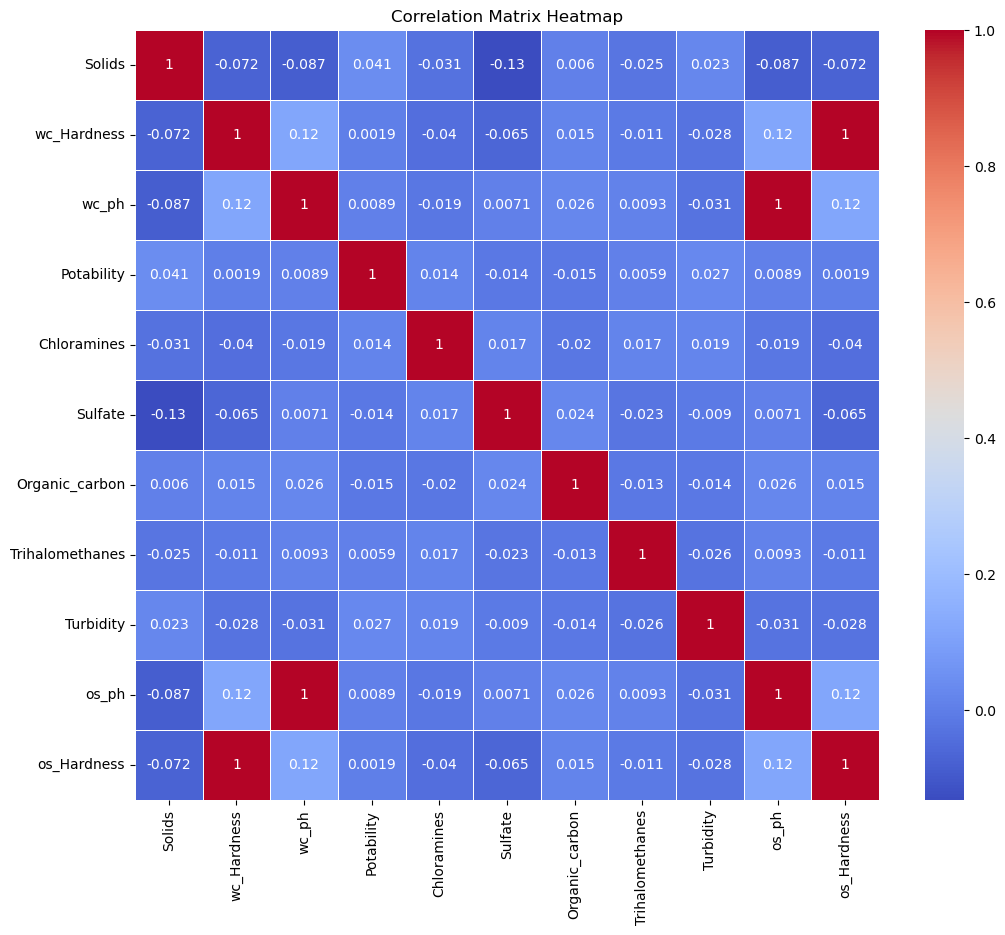


Cleaned DataFrame Summary:
             Solids   wc_Hardness         wc_ph    Potability   Chloramines  \
count  30848.000000  30848.000000  30848.000000  30848.000000  30848.000000   
mean       9.898429    195.923622      7.100639      0.397822      7.119469   
std        0.427749     32.336066      1.560115      0.489456      1.555939   
min        5.774373     73.492234      0.227499      0.000000      1.390871   
25%        9.647965    176.832962      6.102389      0.000000      6.155601   
50%        9.931704    197.123423      7.038721      0.000000      7.138343   
75%       10.196376    216.086183      8.052931      1.000000      8.087682   
max       10.704160    317.338124     14.000000      1.000000     12.653362   

            Sulfate  Organic_carbon  Trihalomethanes     Turbidity  \
count  30848.000000    30848.000000     30848.000000  30848.000000   
mean       5.806945       14.381768         4.183263      3.965622   
std        0.114184        3.324323         0.2453

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Handle Missing Values ---

# Check for missing values before imputation
print("\nMissing Values Before Imputation:")
print(df.isnull().sum())

# Impute missing values for 'wc_ph', 'Sulfate', and 'Trihalomethanes' using median
df['wc_ph'].fillna(df['wc_ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

# Verify no missing values remain
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# --- 2. Outlier Treatment ---

# Function to remove outliers using the IQR method
def remove_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# List of features with outliers
features_with_outliers = ['Solids', 'Trihalomethanes', 'Sulfate']

# Apply outlier removal for selected features
for feature in features_with_outliers:
    df = remove_outliers_iqr(df, feature)

print("\nOutliers have been removed.")

# --- 3. Feature Engineering: Log Transformation for Skewed Features ---

# Log-transform skewed features
skewed_features = ['Solids', 'Trihalomethanes', 'Sulfate']
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])

print("\nLog transformation applied to skewed features.")

# --- 4. Correlation Matrix ---

# Compute correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# --- 5. Verify Cleaned DataFrame ---

print("\nCleaned DataFrame Summary:")
print(df.describe())
print("\nCleaned DataFrame Head:")
print(df.head())


In [20]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



--- Basic Information About the Dataset ---
<class 'pandas.core.frame.DataFrame'>
Index: 30848 entries, 0 to 32174
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solids           30848 non-null  float64
 1   wc_Hardness      30848 non-null  float64
 2   wc_ph            30848 non-null  float64
 3   Potability       30848 non-null  int64  
 4   Chloramines      30848 non-null  float64
 5   Sulfate          30848 non-null  float64
 6   Organic_carbon   30848 non-null  float64
 7   Trihalomethanes  30848 non-null  float64
 8   Turbidity        30848 non-null  float64
 9   os_ph            30848 non-null  float64
 10  os_Hardness      30848 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.8 MB
None

--- Summary Statistics ---
             Solids   wc_Hardness         wc_ph    Potability   Chloramines  \
count  30848.000000  30848.000000  30848.000000  30848.000000  30848.000000   
mean       

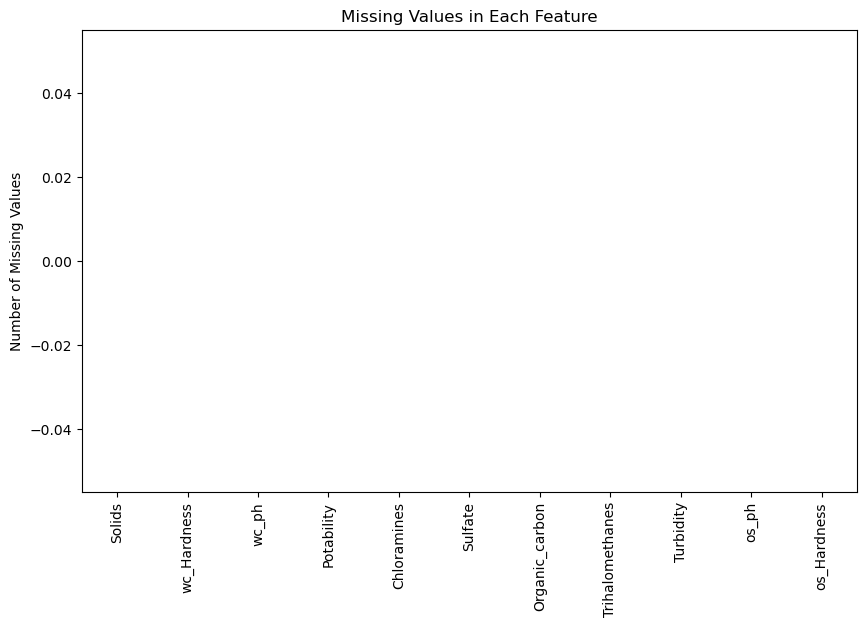


--- Feature Distributions ---


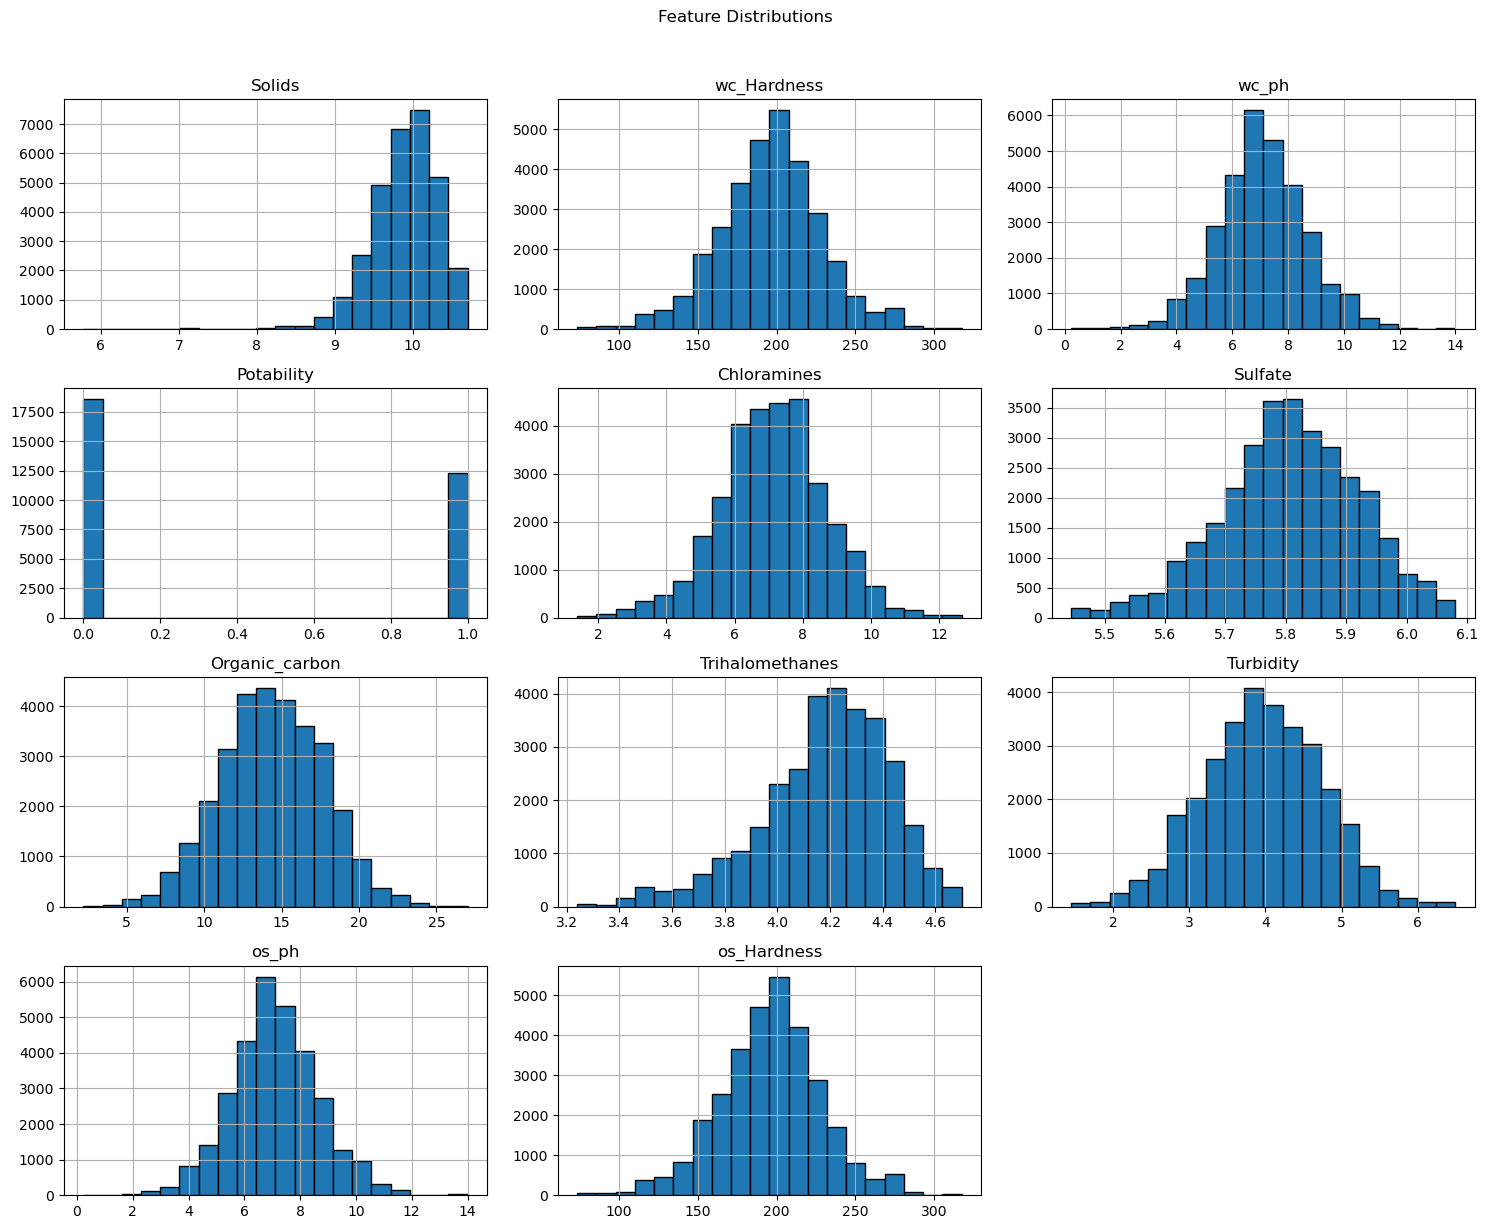


--- Boxplots to Identify Capped Values and Outliers ---


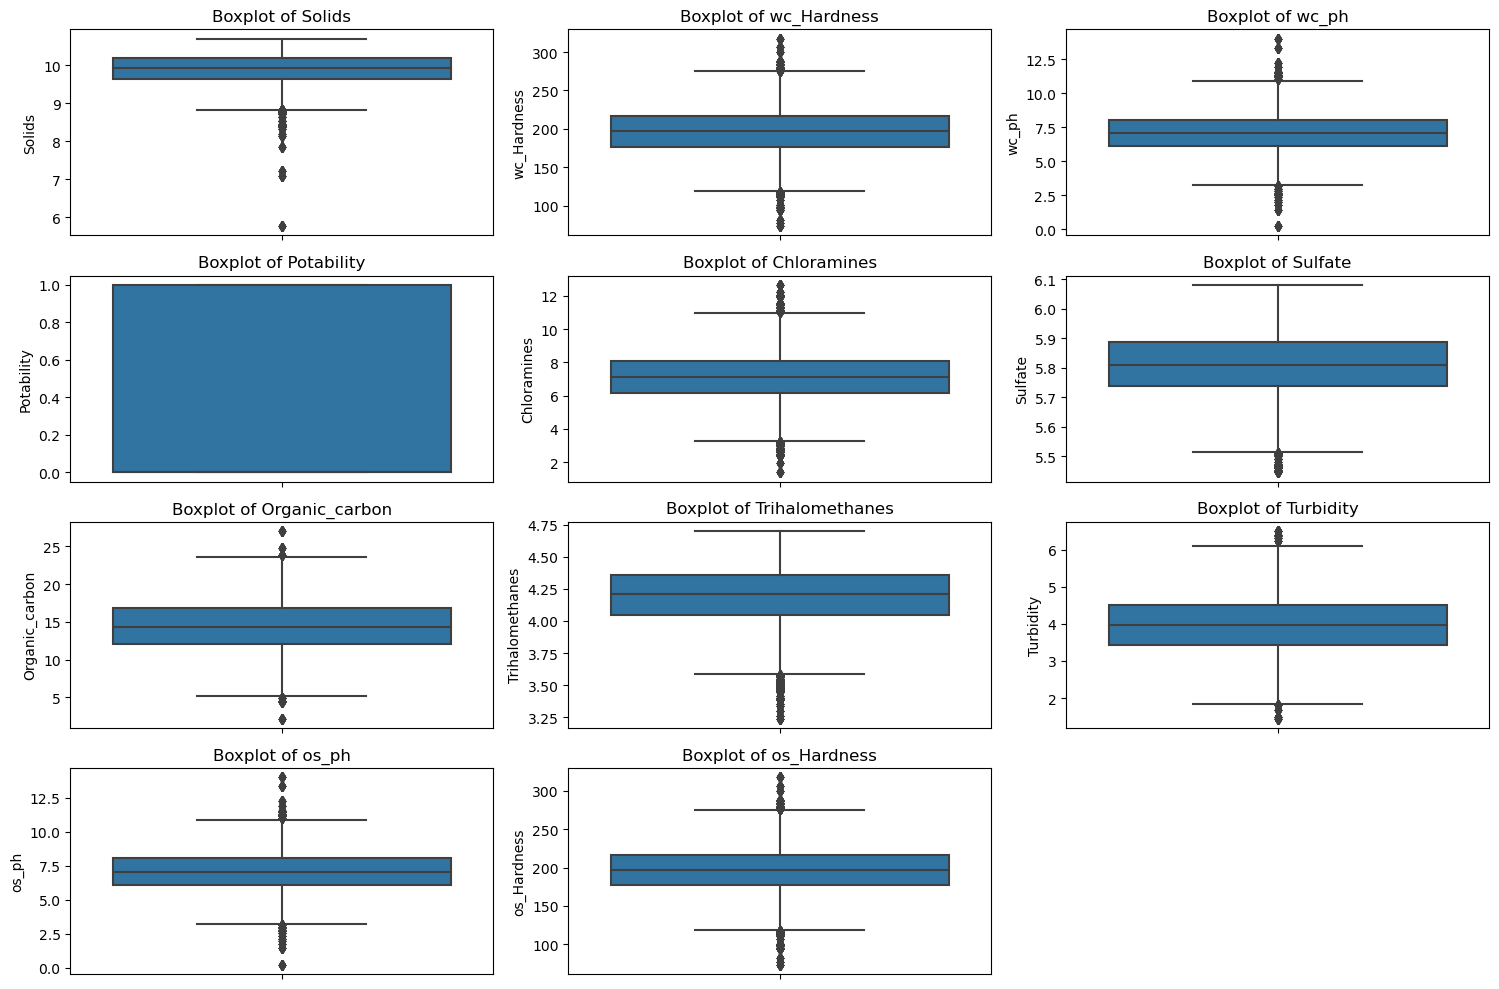


--- Observations ---
1. Missing Values: No missing values found in the dataset.

2. Distributions:
   - Features like 'Solids', 'Trihalomethanes', and 'Sulfate' appear to be skewed.
   - 'wc_ph' and 'wc_Hardness' seem to follow a more normal distribution.
   - Some features exhibit bimodal or multimodal distributions, indicating potential subgroups.

3. Capped Values and Outliers:
   - Boxplots reveal potential outliers in features like 'Solids', 'Trihalomethanes', and 'Sulfate'.
   - Capped values may be present in 'Trihalomethanes' due to regulatory limits.
   - Further investigation may be needed to confirm if these are true outliers or valid data points.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Basic Information About the Dataset ---

print("\n--- Basic Information About the Dataset ---")
print(df.info())

# --- 2. Summary Statistics ---

print("\n--- Summary Statistics ---")
print(df.describe())

# --- 3. Check for Missing Values ---

print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values)

# Plot missing values as a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title("Missing Values in Each Feature")
plt.ylabel("Number of Missing Values")
plt.show()

# --- 4. Visualize Feature Distributions ---

print("\n--- Feature Distributions ---")

# Plot histograms for each numerical feature
df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

# --- 5. Check for Capped Values and Outliers ---

print("\n--- Boxplots to Identify Capped Values and Outliers ---")

# Plot boxplots for each numerical feature to identify capped values and outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# --- 6. Observations Based on the Analysis ---

print("\n--- Observations ---")

# Observations about missing values
if missing_values.sum() > 0:
    print("1. Missing Values:")
    print("   - The following features have missing values:")
    for col, val in missing_values.items():
        if val > 0:
            print(f"     * {col}: {val} missing values")
else:
    print("1. Missing Values: No missing values found in the dataset.")

# Observations about distributions
print("\n2. Distributions:")
print("   - Features like 'Solids', 'Trihalomethanes', and 'Sulfate' appear to be skewed.")
print("   - 'wc_ph' and 'wc_Hardness' seem to follow a more normal distribution.")
print("   - Some features exhibit bimodal or multimodal distributions, indicating potential subgroups.")

# Observations about capped values and outliers
print("\n3. Capped Values and Outliers:")
print("   - Boxplots reveal potential outliers in features like 'Solids', 'Trihalomethanes', and 'Sulfate'.")
print("   - Capped values may be present in 'Trihalomethanes' due to regulatory limits.")
print("   - Further investigation may be needed to confirm if these are true outliers or valid data points.")

In [22]:
pip install mlflow dagshub scikit-learn pandas numpy matplotlib

  Obtaining dependency information for dacite~=1.6.0 from https://files.pythonhosted.org/packages/06/9d/11a073172d889e9e0d0ad270a1b468876c82d759af7864a8095dfc73f46d/dacite-1.6.0-py3-none-any.whl.metadata
  Using cached dacite-1.6.0-py3-none-any.whl.metadata (14 kB)
Using cached dacite-1.6.0-py3-none-any.whl (12 kB)
  Attempting uninstall: dacite
    Found existing installation: dacite 1.8.1
    Uninstalling dacite-1.8.1:
      Successfully uninstalled dacite-1.8.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.1 requires dacite>=1.8, but you have dacite 1.6.0 which is incompatible.


In [23]:
import mlflow
import dagshub
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [24]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [25]:
import dagshub
dagshub.init(repo_owner='chinmay.gedam30', repo_name='Water_qu', mlflow=True)

Accessing as chinmay.gedam30

Initialized MLflow to track repo "chinmay.gedam30/Water_qu"

Repository chinmay.gedam30/Water_qu initialized!

In [26]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/chinmay.gedam30/Water_qu.mlflow")

In [27]:
mlflow.set_experiment("Experiment 1")

MlflowException: Cannot set a deleted experiment 'Experiment 1' as the active experiment. You can restore the experiment, or permanently delete the experiment to create a new one.

In [ ]:
mlflow.set_experiment("Experiment 7")

In [ ]:
mlflow.set_experiment("Experiment 2")

In [ ]:
mlflow.set_experiment("Experiment 3")

In [ ]:
mlflow.set_experiment("Experiment 4")

In [ ]:
mlflow.set_experiment("Experiment 5")

In [ ]:
mlflow.set_experiment("Experiment 6")

In [28]:
# Split features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

In [29]:
# Identify numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing steps
preprocessing_pipeline = ColumnTransformer([
    ('standard_scaler', StandardScaler(), numeric_features),
    ('minmax_scaler', MinMaxScaler(), numeric_features),
    ('log_transform', FunctionTransformer(np.log1p, validate=False), numeric_features),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [30]:
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', LogisticRegression(solver='liblinear'))
])

In [31]:
# Cross-validation folds
cv_folds = [3, 10]

# Hyperparameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

for folds in cv_folds:
    with mlflow.start_run(run_name=f"LogisticRegression_CV_{folds}Folds"):
        # Perform cross-validation
        kf = KFold(n_splits=folds, shuffle=True, random_state=42)
        predictions = cross_val_predict(pipeline, X, y, cv=kf)
        f1 = f1_score(y, predictions)
        
        # Compute confusion matrix
        tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
        
        # Log parameters and metrics
        mlflow.log_param("cv_folds", folds)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("true_positive", tp)
        mlflow.log_metric("true_negative", tn)
        mlflow.log_metric("false_positive", fp)
        mlflow.log_metric("false_negative", fn)
        
        # Print results
        print(f"\nResults for {folds}-fold Cross Validation:")
        print(f"F1-Score: {f1:.4f}")
        print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
        print(classification_report(y, predictions))

        # Log model
        mlflow.sklearn.log_model(pipeline, f"logistic_regression_cv_{folds}")


2024/12/21 13:40:40 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



RestException: INVALID_PARAMETER_VALUE: Response: {'error_code': 'INVALID_PARAMETER_VALUE'}

In [32]:
from sklearn.model_selection import GridSearchCV
# Perform Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X, y)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Log best parameters and score
with mlflow.start_run(run_name="LogisticRegression_Hyperparameter_Tuning"):
    mlflow.log_params(best_params)
    mlflow.log_metric("best_f1_score", best_score)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_logistic_regression_model")

    print("\nBest Parameters:", best_params)
    print(f"Best F1-Score: {best_score:.4f}")

KeyboardInterrupt: 

In [ ]:
mlflow.set_experiment("Experiment#2")

In [33]:
import mlflow
import dagshub
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report


In [34]:
# Split features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

In [35]:
# Identify numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing steps
preprocessing_pipeline = ColumnTransformer([
    ('standard_scaler', StandardScaler(), numeric_features),
    ('minmax_scaler', MinMaxScaler(), numeric_features),
    ('log_transform', FunctionTransformer(np.log1p, validate=False), numeric_features),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [36]:
classifiers = {
    "LogisticRegression": LogisticRegression(solver='liblinear'),
    "RidgeClassifier": RidgeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [37]:
# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each classifier
for clf_name, clf in classifiers.items():
    with mlflow.start_run(run_name=f"{clf_name}_Pipeline"):
        # Create a pipeline with preprocessing and the classifier
        pipeline = Pipeline([
            ('preprocessing', preprocessing_pipeline),
            ('classifier', clf)
        ])
        
        # Perform cross-validation
        predictions = cross_val_predict(pipeline, X, y, cv=cv)
        
        # Compute metrics
        f1 = f1_score(y, predictions)
        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)
        tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
        
        # Log parameters and metrics
        mlflow.log_param("classifier", clf_name)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("true_positive", tp)
        mlflow.log_metric("true_negative", tn)
        mlflow.log_metric("false_positive", fp)
        mlflow.log_metric("false_negative", fn)
        
        # Print results
        print(f"\nResults for {clf_name}:")
        print(f"F1-Score: {f1:.4f}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
        print(classification_report(y, predictions))
        
        # Log model
        mlflow.sklearn.log_model(pipeline, f"{clf_name}_model")

RestException: INVALID_PARAMETER_VALUE: Response: {'error_code': 'INVALID_PARAMETER_VALUE'}

In [ ]:
mlflow.set_experiment("Experiment#3")

In [38]:
# Split features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

In [39]:
# Create new features
X['Hardness_Sulfate_Sum'] = X['wc_Hardness'] + X['Sulfate']
#X['Solids_Conductivity_Ratio'] = X['Solids'] / (X['Conductivity'])  # Adding small value to avoid division by zero
X['Chloramines_Trihalomethanes_Product'] = X['Chloramines'] * X['Trihalomethanes']

# Verify new features
print(X.head())

      Solids  wc_Hardness      wc_ph  Chloramines   Sulfate  Organic_carbon  \
0   9.999680   214.373394   8.316766     8.059332  5.880215       18.436524   
1   9.797015   181.101509   9.092223     6.546600  5.740229       11.558279   
2  10.266382   188.313324   5.584087     7.544869  5.792033        8.399735   
3  10.266418   248.071735  10.223862     7.513408  5.978033       13.789695   
4   9.523185   203.361523   8.635849     4.563009  5.718046       12.363817   

   Trihalomethanes  Turbidity      os_ph  os_Hardness  Hardness_Sulfate_Sum  \
0         4.618498   4.628771   8.316766   214.373394            220.253609   
1         3.496447   4.075075   9.092223   181.101509            186.841739   
2         4.023884   2.559708   5.584087   188.313324            194.105356   
3         4.449727   2.672989  10.223862   248.071735            254.049769   
4         4.155727   4.401425   8.635849   203.361523            209.079569   

   Chloramines_Trihalomethanes_Product  
0        

In [40]:
# Identify numerical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define preprocessing steps
preprocessing_pipeline = ColumnTransformer([
    ('standard_scaler', StandardScaler(), numeric_features),
    ('minmax_scaler', MinMaxScaler(), numeric_features)
])

In [ ]:
# Define the pipeline with Logistic Regression
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Start MLFlow run
with mlflow.start_run(run_name="Feature_Engineering_LogisticRegression"):
    # Perform cross-validation
    predictions = cross_val_predict(pipeline, X, y, cv=cv)
    
    # Compute metrics
    f1 = f1_score(y, predictions)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    
    # Log new features
    mlflow.log_param("new_features", ['Hardness_Sulfate_Sum', 'Solids_Conductivity_Ratio', 'Chloramines_Trihalomethanes_Product'])
    
    # Log metrics
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)
    
    # Print results
    print(f"\nF1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(classification_report(y, predictions))
    
    # Log model
    mlflow.sklearn.log_model(pipeline, "logistic_regression_with_feature_engineering")

In [ ]:
mlflow.set_experiment("Experiment#4")

In [ ]:
import mlflow
import dagshub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report

In [ ]:
# Split features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

In [ ]:
def correlation_threshold(X, threshold=0.85):
    corr_matrix = X.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
    return X.drop(columns=to_drop), to_drop

X_corr, dropped_corr_features = correlation_threshold(X)
print("Dropped features due to high correlation:", dropped_corr_features)

In [ ]:
def variance_threshold(X, threshold=0.01):
    selector = VarianceThreshold(threshold=threshold)
    X_var = selector.fit_transform(X)
    kept_features = X.columns[selector.get_support()]
    dropped_features = X.columns[~selector.get_support()]
    return pd.DataFrame(X_var, columns=kept_features), dropped_features

X_var, dropped_var_features = variance_threshold(X_corr)
print("Dropped features due to low variance:", dropped_var_features)

In [ ]:
def feature_importance_selection(X, y, threshold='median'):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)
    selector = SelectFromModel(clf, threshold=threshold, prefit=True)
    X_imp = selector.transform(X)
    kept_features = X.columns[selector.get_support()]
    dropped_features = X.columns[~selector.get_support()]
    return pd.DataFrame(X_imp, columns=kept_features), dropped_features, clf.feature_importances_

X_imp, dropped_imp_features, importances = feature_importance_selection(X_var, y)
print("Dropped features due to low feature importance:", dropped_imp_features)


In [ ]:
# Define the final preprocessing pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Start MLFlow run
with mlflow.start_run(run_name="Feature_Selection_LogisticRegression"):
    # Perform cross-validation
    predictions = cross_val_predict(pipeline, X_imp, y, cv=cv)
    
    # Compute metrics
    f1 = f1_score(y, predictions)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    
    # Log selected features
    mlflow.log_param("selected_features", list(X_imp.columns))
    mlflow.log_param("dropped_corr_features", dropped_corr_features)
    mlflow.log_param("dropped_var_features", dropped_var_features)
    mlflow.log_param("dropped_imp_features", dropped_imp_features)
    
    # Log metrics
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)
    
    # Print results
    print(f"\nF1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(classification_report(y, predictions))
    
    # Log model
    mlflow.sklearn.log_model(pipeline, "logistic_regression_with_feature_selection")

In [ ]:
mlflow.set_experiment("Experiment#5")

In [ ]:
import mlflow
import dagshub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report

In [ ]:
# Split features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Cumulative Explained Variance)')
plt.grid(True)
plt.show()

In [ ]:
# Find the number of components explaining 95% of the variance
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print(f"\nNumber of components selected: {n_components}")

In [ ]:
# Define the pipeline with PCA and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Start MLFlow run
with mlflow.start_run(run_name="PCA_LogisticRegression"):
    # Perform cross-validation
    predictions = cross_val_predict(pipeline, X, y, cv=cv)
    
    # Compute metrics
    f1 = f1_score(y, predictions)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    
    # Log parameters and metrics
    mlflow.log_param("n_pca_components", n_components)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)
    
    # Print results
    print(f"\nF1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(classification_report(y, predictions))
    
    # Log model
    mlflow.sklearn.log_model(pipeline, "logistic_regression_with_pca")

In [ ]:
mlflow.set_experiment("Experiment#6")

In [ ]:
import mlflow
import dagshub
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report


In [ ]:
# Split features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

In [ ]:
# Base classifiers
base_classifiers = [
    ('lr', LogisticRegression(solver='liblinear')),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Meta-classifier
meta_classifier = LogisticRegression(solver='liblinear')

# Stacking classifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

In [ ]:
# Define the preprocessing pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('stacking', stacking_clf)
])

In [ ]:
# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Start MLFlow run
with mlflow.start_run(run_name="Stacking_Classifier_Experiment"):
    # Perform cross-validation
    predictions = cross_val_predict(pipeline, X, y, cv=cv)
    
    # Compute metrics
    f1 = f1_score(y, predictions)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    
    # Log parameters
    mlflow.log_param("base_classifiers", ['Logistic Regression', 'Random Forest', 'XGBClassifier'])
    mlflow.log_param("meta_classifier", 'Logistic Regression')
    
    # Log metrics
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)
    
    # Print results
    print(f"\nF1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(classification_report(y, predictions))
    
    # Log model
    mlflow.sklearn.log_model(pipeline, "stacking_classifier_model")

In [ ]:
mlflow.set_experiment("Experiment#7")

In [ ]:
pip install scikit-optimize


In [ ]:
import skopt
print(skopt.__version__)


In [ ]:
import skopt

import mlflow
import dagshub
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical


In [ ]:
# Split features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

In [ ]:
# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [ ]:
# Hyperparameter search space for RandomForestClassifier
param_space = {
    'classifier__n_estimators': Integer(50, 300),
    'classifier__max_depth': Integer(3, 20),
    'classifier__min_samples_split': Integer(2, 10),
    'classifier__min_samples_leaf': Integer(1, 10),
    'classifier__criterion': Categorical(['gini', 'entropy'])
}

In [ ]:
# Create the full pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Define the Bayesian Optimization search
bayes_search = BayesSearchCV(
    pipeline,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Start MLFlow run
with mlflow.start_run(run_name="Bayesian_Optimization_RandomForest"):
    # Fit the model with Bayesian Optimization
    bayes_search.fit(X, y)
    
    # Best parameters and best score
    best_params = bayes_search.best_params_
    best_score = bayes_search.best_score_
    best_model = bayes_search.best_estimator_
    
    # Cross-validation predictions
    predictions = cross_val_predict(best_model, X, y, cv=5)
    
    # Compute metrics
    f1 = f1_score(y, predictions)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    
    # Log hyperparameters
    mlflow.log_params(best_params)
    
    # Log metrics
    mlflow.log_metric("best_cv_f1_score", best_score)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)
    
    # Print results
    print("\nBest Hyperparameters:", best_params)
    print(f"Best Cross-Validation F1-Score: {best_score:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(classification_report(y, predictions))
    
    # Log model
    mlflow.sklearn.log_model(best_model, "random_forest_bayesian_optimization")

In [ ]:
pip install matplotlib pandas

In [ ]:
import mlflow
import mlflow.tracking
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mlflow.set_tracking_uri("https://dagshub.com/chinmay.gedam30/Water_qu.mlflow")

In [ ]:
# Replace these with the actual F1-scores from Experiment #2
f1_scores = {
    "Logistic Regression": 0.09,   # Replace with actual value
    "Ridge Classifier": 0.15,      # Replace with actual value
    "Random Forest Classifier": 1,  # Replace with actual value
    "XGBClassifier": 1          # Replace with actual value
}

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
models = list(f1_scores.keys())
scores = list(f1_scores.values())

# Plot the bars
bars = plt.bar(models, scores, color=['skyblue', 'lightgreen', 'orange', 'tomato'])

# Add F1-score annotations on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.02, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12, color='black')

# Customize the plot
plt.title('F1-Score Comparison of Different Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
pip install joblib

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


In [ ]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'potability_rforest_model.pkl')
print("Model saved as 'potability_rforest_model.pkl'")

In [ ]:
# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')
print("Model loaded successfully.")

# Example prediction
sample_input = X_test[:5]
predictions = loaded_model.predict(sample_input)
print("Predictions on sample input:", predictions)


In [41]:
pip install fastapi

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install fastapi uvicorn

Note: you may need to restart the kernel to use updated packages.


In [43]:
import fastapi